# Laboratory 2

## Import needed libraries

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import csv
import arff
from scipy.io.arff import loadarff 
from sklearn import decomposition

from sklearn import datasets
from sklearn.decomposition import PCA

## Load datasets
In this case we will work with Polish companies bankruptcy dataset.

In [32]:
# data = arff.load('./1year.arff')['data']
data1 = loadarff('1year.arff')
data2 = loadarff('2year.arff')
data3 = loadarff('3year.arff')
data4 = loadarff('4year.arff')
data5 = loadarff('5year.arff')

d1 = pd.DataFrame(data1[0])
d2 = pd.DataFrame(data2[0])
d3 = pd.DataFrame(data3[0])
d4 = pd.DataFrame(data4[0])
d5 = pd.DataFrame(data5[0])

# f = [d1, d2, d3, d4, d5]
# f = [d1, d2,]
f = [  d5 ]
all_df = pd.concat(f)

bank_df = pd.DataFrame(data5[0])
bank_df = bank_df.dropna()
bank_df


all_df = all_df.astype(float)
all_df = all_df.dropna()
all_df.groupby("class").describe()

# all_df = all_df.drop(columns=["Attr4","Attr5","Attr15","Attr27","Attr21","Attr37","Attr41","Attr49","Attr41","Attr57","Attr59"])
# all_df = all_df.drop(columns=["Attr39","Attr42","Attr43","Attr44","Attr13","Attr20","Attr45","Attr56","Attr58"])

corr = all_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
Attr1,1.000000,-0.997424,-0.419064,-0.000315,0.001975,0.964857,-0.996018,-0.002740,0.851776,0.997277,-0.913548,-0.676552,-0.003924,-0.996018,-0.002429,0.065237,-0.004897,-0.990482,-0.083606,0.129940,-0.000551,-0.925461,0.023737,-0.225916,0.989123,0.026184,0.004717,-0.001441,-0.068985,-0.032696,-0.084064,-0.001216,0.016837,0.001110,-0.874382,0.789164,0.001093,0.997455,0.002229,-0.057511,0.000881,0.002856,0.032464,-0.011728,0.009496,-0.036548,0.001517,-0.867034,0.004206,0.001140,0.662227,-0.001167,0.000524,-0.001303,0.003386,0.032620,0.007364,0.280463,0.002058,-0.000006,0.207221,-0.024792,0.021524,-0.001236,-0.020325
Attr2,-0.997424,1.000000,0.429318,0.000047,-0.001621,-0.966653,0.998912,-0.003021,-0.844607,-0.999918,0.935974,0.704245,0.003725,0.998912,0.002830,-0.037810,-0.001659,0.993314,0.090694,-0.139449,0.000840,0.945752,-0.016983,0.229947,-0.991886,0.001054,0.000506,0.001665,0.062673,0.029134,0.091363,0.000951,-0.011322,0.008771,0.896935,-0.779960,-0.000213,-0.999514,0.025209,0.056430,0.000014,0.002597,-0.039572,0.006986,-0.000744,0.036924,-0.001658,0.885146,0.002246,-0.000008,-0.662722,0.000967,-0.000670,0.001518,-0.002619,-0.011925,-0.000456,-0.291473,0.000226,0.000854,-0.206899,0.013289,-0.011371,0.004276,0.009299
Attr3,-0.419064,0.429318,1.000000,0.233917,0.032765,-0.423778,0.453133,0.373729,-0.354819,-0.424194,0.541616,0.538968,-0.006169,0.453131,-0.027926,0.311599,0.364916,0.449665,0.069686,0.042751,0.008685,0.522257,0.019481,0.148474,-0.378834,0.313782,0.023685,0.069551,-0.037893,-0.030806,0.069557,-0.002912,0.371382,0.267153,0.532499,-0.340939,0.039654,-0.432847,0.201753,0.197076,-0.000189,0.017886,0.042356,0.033618,0.050686,0.231998,0.007222,0.489292,0.025303,0.524042,-0.715361,-0.002680,0.007369,0.068890,0.212546,0.158239,0.002337,-0.202355,-0.002751,0.018134,-0.184828,-0.284207,0.402265,0.036008,-0.138399
Attr4,-0.000315,0.000047,0.233917,1.000000,0.017271,-0.003804,0.005785,0.216141,-0.024791,0.001274,0.024211,0.066558,-0.002889,0.005784,-0.033163,0.141899,0.213894,0.005444,0.000199,0.147049,-0.001909,0.018216,-0.000855,0.010728,0.009883,0.140461,0.019508,0.177601,-0.058538,-0.003575,0.000298,-0.004633,0.569447,0.083338,0.022301,-0.044530,0.008763,0.000026,0.029158,0.958805,-0.002841,-0.002264,0.081426,0.039601,0.005734,0.983940,0.000669,0.020800,-0.001215,0.262756,-0.141748,-0.004645,0.027355,0.175957,0.044386,0.023703,0.000628,-0.005334,-0.009907,0.001220,-0.017914,-0.075868,0.543837,0.030660,-0.030148
Attr5,0.001975,-0.001621,0.032765,0.017271,1.000000,0.001094,-0.000055,0.022028,-0.032499,0.001913,0.005528,0.015216,0.000361,-0.000055,-0.003018,0.011353,0.022056,-0.000092,0.021778,-0.018212,-0.000003,0.005323,0.021474,0.001952,0.005352,0.008340,-0.005753,0.007456,0.059544,-0.021885,0.021815,0.001141,0.012709,-0.021117,0.006248,-0.028571,0.002570,0.001759,0.017673,0.016823,0.000214,0.019184,-0.014057,-0.009606,0.006728,0.017673,0.002536,0.006363,0.021765,0.020109,-0.035998,0.001454,-0.000254,0.007438,0.048735,0.018918,0.000563,-0.030297,-0.000269,0.002450,-0.008342,-0.038854,0.013566,-0.002069,-0.009082
Attr6,0.964857,-0.966653,-0.423778,-0.003804,0.001094,1.000000,-0.966184,-0.009499,0.819116,0.966439,-0.906172,-0.682727,-0.003576,-0.966184,-0.001717,0.033016,-0.010844,-0.960766,-0.087675,0.132343,-0.000417,-0.913501,0.016457,-0.007463,0.958336,-0.004697,-0.002033,-0.000460,-0.059818,-0.027338,-0.088315,-0.000687,0.004008,-0.014886,-0.866346,0.758996,0.000006,0.966377,-0.023468,-0.057763,-0.000286,-0.002352,0.038288,-0.005764,-0.001719,-0.039069,0.001745,-0.855031,-0.001

In [33]:
print(d1.groupby("class")['class'].count()[1] / d1.groupby("class")['class'].count()[0])
print(d2.groupby("class")['class'].count()[1] / d2.groupby("class")['class'].count()[0])
print(d3.groupby("class")['class'].count()[1] / d3.groupby("class")['class'].count()[0])
print(d4.groupby("class")['class'].count()[1] / d4.groupby("class")['class'].count()[0])
print(d5.groupby("class")['class'].count()[1] / d5.groupby("class")['class'].count()[0])


0.04011249259917111
0.04092909035096695
0.04946043165467626
0.055513635873666055
0.07454545454545454


In [34]:
bank_df = bank_df.astype(float)
# bank_df = bank_df.drop(columns=["Attr4","Attr5","Attr15","Attr21","Attr27","Attr34","Attr37","Attr41"])
# bank_df = bank_df.drop(bank_df.iloc[:, 13:65],axis = 1)
corr = bank_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
Attr1,1.000000,-0.997424,-0.419064,-0.000315,0.001975,0.964857,-0.996018,-0.002740,0.851776,0.997277,-0.913548,-0.676552,-0.003924,-0.996018,-0.002429,0.065237,-0.004897,-0.990482,-0.083606,0.129940,-0.000551,-0.925461,0.023737,-0.225916,0.989123,0.026184,0.004717,-0.001441,-0.068985,-0.032696,-0.084064,-0.001216,0.016837,0.001110,-0.874382,0.789164,0.001093,0.997455,0.002229,-0.057511,0.000881,0.002856,0.032464,-0.011728,0.009496,-0.036548,0.001517,-0.867034,0.004206,0.001140,0.662227,-0.001167,0.000524,-0.001303,0.003386,0.032620,0.007364,0.280463,0.002058,-0.000006,0.207221,-0.024792,0.021524,-0.001236,-0.020325
Attr2,-0.997424,1.000000,0.429318,0.000047,-0.001621,-0.966653,0.998912,-0.003021,-0.844607,-0.999918,0.935974,0.704245,0.003725,0.998912,0.002830,-0.037810,-0.001659,0.993314,0.090694,-0.139449,0.000840,0.945752,-0.016983,0.229947,-0.991886,0.001054,0.000506,0.001665,0.062673,0.029134,0.091363,0.000951,-0.011322,0.008771,0.896935,-0.779960,-0.000213,-0.999514,0.025209,0.056430,0.000014,0.002597,-0.039572,0.006986,-0.000744,0.036924,-0.001658,0.885146,0.002246,-0.000008,-0.662722,0.000967,-0.000670,0.001518,-0.002619,-0.011925,-0.000456,-0.291473,0.000226,0.000854,-0.206899,0.013289,-0.011371,0.004276,0.009299
Attr3,-0.419064,0.429318,1.000000,0.233917,0.032765,-0.423778,0.453133,0.373729,-0.354819,-0.424194,0.541616,0.538968,-0.006169,0.453131,-0.027926,0.311599,0.364916,0.449665,0.069686,0.042751,0.008685,0.522257,0.019481,0.148474,-0.378834,0.313782,0.023685,0.069551,-0.037893,-0.030806,0.069557,-0.002912,0.371382,0.267153,0.532499,-0.340939,0.039654,-0.432847,0.201753,0.197076,-0.000189,0.017886,0.042356,0.033618,0.050686,0.231998,0.007222,0.489292,0.025303,0.524042,-0.715361,-0.002680,0.007369,0.068890,0.212546,0.158239,0.002337,-0.202355,-0.002751,0.018134,-0.184828,-0.284207,0.402265,0.036008,-0.138399
Attr4,-0.000315,0.000047,0.233917,1.000000,0.017271,-0.003804,0.005785,0.216141,-0.024791,0.001274,0.024211,0.066558,-0.002889,0.005784,-0.033163,0.141899,0.213894,0.005444,0.000199,0.147049,-0.001909,0.018216,-0.000855,0.010728,0.009883,0.140461,0.019508,0.177601,-0.058538,-0.003575,0.000298,-0.004633,0.569447,0.083338,0.022301,-0.044530,0.008763,0.000026,0.029158,0.958805,-0.002841,-0.002264,0.081426,0.039601,0.005734,0.983940,0.000669,0.020800,-0.001215,0.262756,-0.141748,-0.004645,0.027355,0.175957,0.044386,0.023703,0.000628,-0.005334,-0.009907,0.001220,-0.017914,-0.075868,0.543837,0.030660,-0.030148
Attr5,0.001975,-0.001621,0.032765,0.017271,1.000000,0.001094,-0.000055,0.022028,-0.032499,0.001913,0.005528,0.015216,0.000361,-0.000055,-0.003018,0.011353,0.022056,-0.000092,0.021778,-0.018212,-0.000003,0.005323,0.021474,0.001952,0.005352,0.008340,-0.005753,0.007456,0.059544,-0.021885,0.021815,0.001141,0.012709,-0.021117,0.006248,-0.028571,0.002570,0.001759,0.017673,0.016823,0.000214,0.019184,-0.014057,-0.009606,0.006728,0.017673,0.002536,0.006363,0.021765,0.020109,-0.035998,0.001454,-0.000254,0.007438,0.048735,0.018918,0.000563,-0.030297,-0.000269,0.002450,-0.008342,-0.038854,0.013566,-0.002069,-0.009082
Attr6,0.964857,-0.966653,-0.423778,-0.003804,0.001094,1.000000,-0.966184,-0.009499,0.819116,0.966439,-0.906172,-0.682727,-0.003576,-0.966184,-0.001717,0.033016,-0.010844,-0.960766,-0.087675,0.132343,-0.000417,-0.913501,0.016457,-0.007463,0.958336,-0.004697,-0.002033,-0.000460,-0.059818,-0.027338,-0.088315,-0.000687,0.004008,-0.014886,-0.866346,0.758996,0.000006,0.966377,-0.023468,-0.057763,-0.000286,-0.002352,0.038288,-0.005764,-0.001719,-0.039069,0.001745,-0.855031,-0.001

In [35]:
bank_df.groupby("class").describe()

Attr1                                                             \
        count      mean       std      min       25%       50%       75%   
class                                                                      
0.0    2929.0  0.083650  1.618894 -0.74484  0.006858  0.043362  0.099094   
1.0     102.0 -0.095785  0.221473 -1.37320 -0.174478 -0.050487  0.020046   

                  Attr2            ...   Attr63           Attr64             \
            max   count      mean  ...      75%      max   count       mean   
class                              ...                                        
0.0    87.45900  2929.0  0.381956  ...  6.80730  117.300  2929.0   8.198574   
1.0     0.25079   102.0  0.786291  ...  4.30125   28.337   102.0  29.654809   

                                                                 
              std       min       25%     50%       75%     max  
class                                                            
0.0     89.590366  0.000000  1.872600  3.2351  5.757500  4744.0  
1.0    175.636265  0.044398  1.581025  3.2119  7.219825  1764.6  

[2 rows x 512 columns]

In [36]:
part = bank_df.astype(float)

bank_df = bank_df.astype(float)
part

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.088238,0.55472,0.011340,1.02050,-66.520,0.342040,0.109490,0.57752,1.0881,0.32036,...,0.080955,0.275430,0.91905,0.002024,7.2711,4.7343,142.760,2.5568,3.25970,0.0
4,0.048179,0.55041,0.107650,1.24370,-22.959,0.000000,0.059280,0.81682,1.5150,0.44959,...,0.240400,0.107160,0.77048,0.139380,10.1180,4.0950,106.430,3.4294,3.36220,0.0
6,0.099486,0.59991,0.374890,1.65290,19.036,0.210840,0.123950,0.66690,1.0972,0.40009,...,0.088581,0.248660,0.91142,0.064344,5.4655,2.4784,130.020,2.8072,31.64500,0.0
7,0.078518,0.20546,0.103930,2.79390,77.784,0.365150,0.093388,3.86720,1.2322,0.79454,...,0.188420,0.098822,0.81158,0.185660,11.3790,3.1692,53.575,6.8129,0.47096,0.0
8,0.125040,0.35440,0.314190,2.71270,17.942,0.305750,0.158430,1.82170,1.2362,0.64560,...,0.191090,0.193680,0.80891,0.264790,4.7737,5.7479,59.841,6.0995,2.22740,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5873,0.016964,0.75503,0.081574,1.12680,-197.070,0.002708,0.016964,0.32445,0.8879,0.24497,...,0.202530,0.069249,0.96847,0.028093,8.9614,4.8148,264.490,1.3800,3.22850,1.0
5874,0.118540,0.51946,0.376420,1.96150,-80.058,0.000000,0.118540,0.92506,1.1781,0.48054,...,0.126960,0.246670,0.88039,0.259280,1.9625,7.1645,121.300,3.0090,5.08030,1.0
5892,0.112350,1.73990,-0.514250,0.43445,-82.297,-0.322010,0.112350,-0.42524,3.4144,-0.73987,...,-0.020766,-0.151850,0.96072,-1.122600,12.9690,32.4040,97.205,3.7549,5.64380,1.0
5893,-0.089739,1.33000,-0.314680,0.67454,-124.530,-1.260700,-0.089739,-0.24799,2.2327,-0.32981,...,0.220300,0.272090,0.79435,-0.428730,4.9425,15.4680,158.060,2.3092,6.41950,1.0


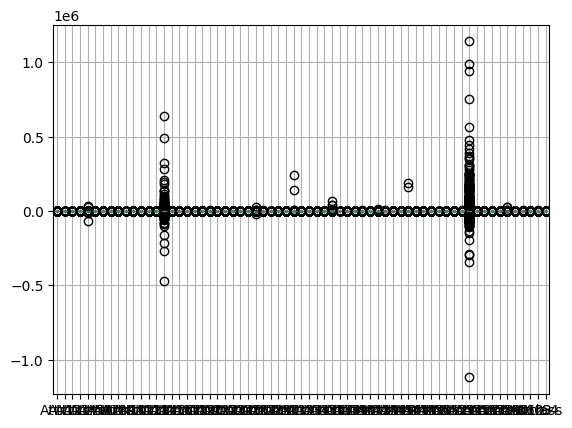

In [41]:
part.boxplot()
plt.show()

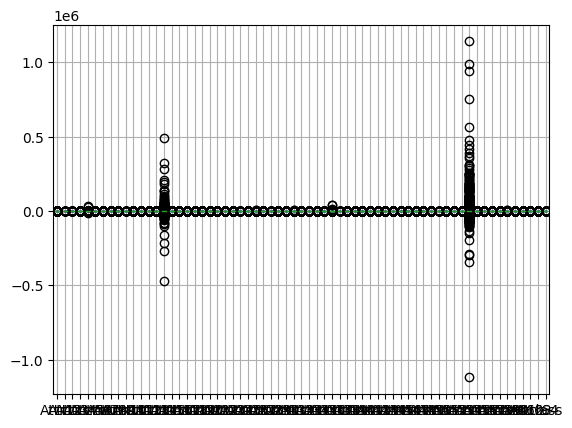

In [42]:
# q_high = part.quantile(0.99)
# q_low = part.quantile(0.01)
# part = part[part < q_high]
# part = part[part > q_low]

part = part[np.abs(part-part.mean()) <= (25*part.std())]
part = part.dropna()
part.boxplot()
plt.show()

In [ ]:
part.groupby("class").describe()

# PCA


In [38]:
pca = decomposition.PCA(n_components=3)
X = part.drop(columns='class')
Y = part["class"]
pca.fit(X)
X_tran = pca.transform(X)

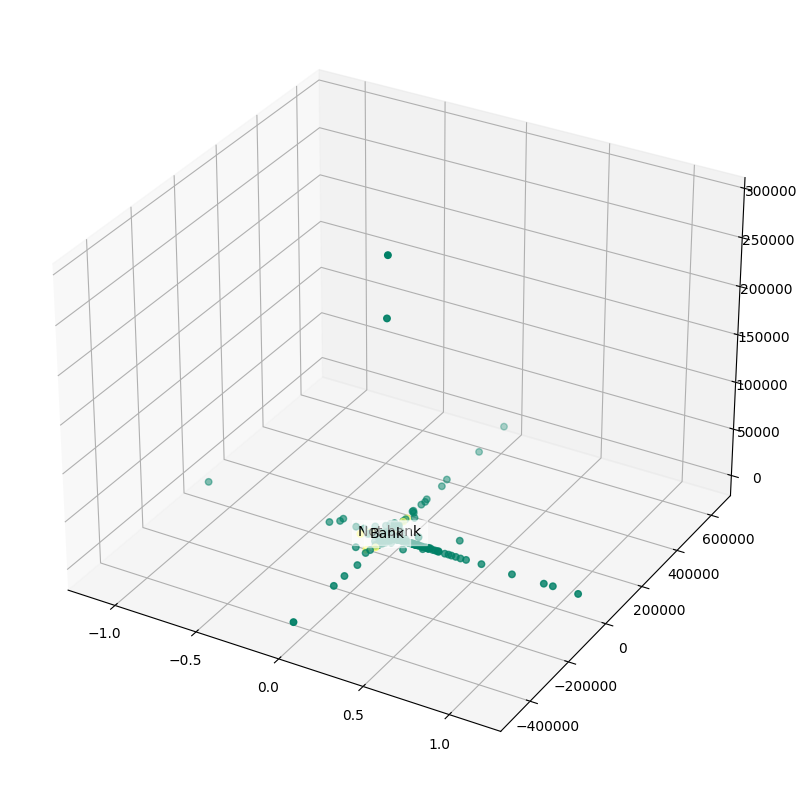

In [40]:
plt.figure(figsize =(10, 10))
plot_axes = plt.axes(projection = '3d')
for name, label in [("Not bank", 0), ("Bank", 1)]:
    plot_axes.text3D(
        X_tran[Y == label, 0].mean(),
        X_tran[Y == label, 1].mean() + 1.5,
        X_tran[Y == label, 1].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
plot_axes.scatter3D(X_tran[:, 0], X_tran[:, 1], X_tran[:, 2], s=22, c=Y, cmap=plt.cm.summer)
plt.show()

## t-SNE

In [12]:
from sklearn import manifold

tsne = manifold.TSNE(n_components=3, random_state=0, perplexity= 30, n_iter=500)
X2 = tsne.fit_transform(X)

/home/krystian/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/krystian/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


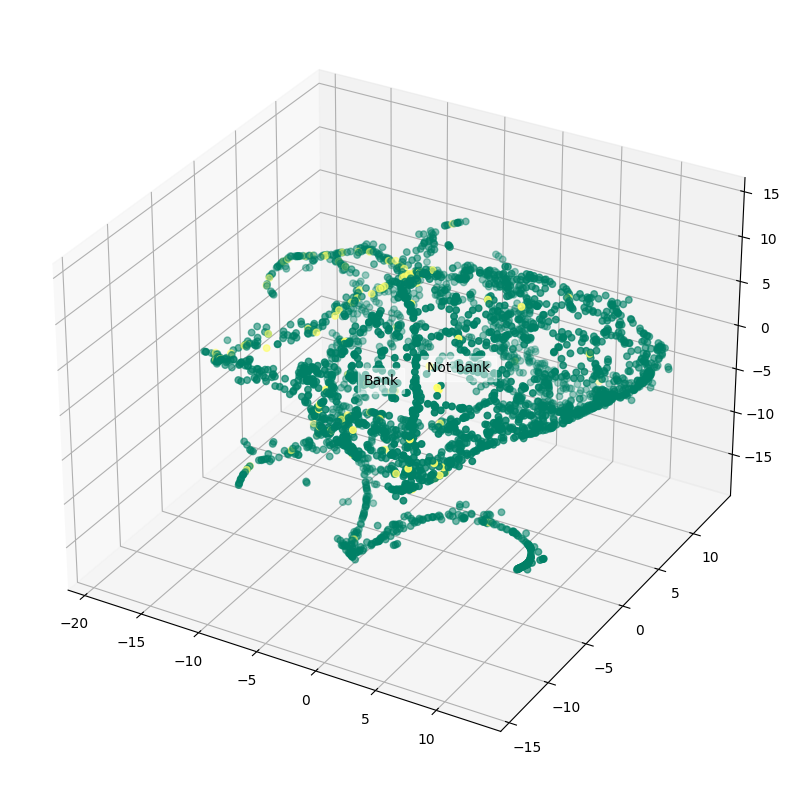

In [13]:
plt.figure(figsize =(10, 10))
plot_axes = plt.axes(projection = '3d')
for name, label in [("Not bank", 0), ("Bank", 1)]:
    plot_axes.text3D(
        X2[Y == label, 0].mean(),
        X2[Y == label, 1].mean() + 1.5,
        X2[Y == label, 1].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
plot_axes.scatter3D(X2[:, 0], X2[:, 1], X2[:, 2], s=22, c=Y, cmap=plt.cm.summer)
plt.show()

## Normalization

In [14]:
classes = part["class"]
noclass = part.drop(["class"],axis=1)
norm = (noclass-noclass.mean())/noclass.std()
norm["class"] = classes
norm
# norm.groupby("class").describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.326817,0.056796,-0.624548,-0.505084,-0.073070,0.251360,0.389284,-0.437304,-0.376653,-0.383695,...,0.047300,0.088071,-0.095577,-0.089898,-0.088869,-0.327711,0.373189,-0.640859,-0.110085,0.0
4,-0.006870,0.042999,-0.221599,-0.388392,-0.023608,-0.012240,0.000023,-0.326910,0.213466,0.034268,...,1.038630,0.001631,-1.041020,-0.059499,-0.078429,-0.386286,0.027731,-0.452371,-0.107137,0.0
6,0.420511,0.201450,0.896500,-0.174457,0.024076,0.150248,0.501387,-0.396071,-0.364074,-0.125828,...,0.094714,0.074319,-0.144132,-0.076106,-0.095490,-0.534405,0.252046,-0.586771,0.706331,0.0
7,0.245851,-1.061197,-0.237163,0.422073,0.090782,0.269170,0.264450,1.080294,-0.177458,1.149924,...,0.715450,-0.002652,-0.779475,-0.049257,-0.073805,-0.471111,-0.474861,0.278489,-0.190295,0.0
8,0.633373,-0.584435,0.642539,0.379620,0.022834,0.223392,0.768699,0.136662,-0.171929,0.668214,...,0.732051,0.046076,-0.796466,-0.031745,-0.098027,-0.234841,-0.415279,0.124390,-0.139776,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5873,-0.266887,0.697995,-0.330698,-0.449509,-0.221305,-0.010153,-0.328039,-0.554050,-0.653396,-0.627525,...,0.803177,-0.017843,0.218913,-0.084129,-0.082670,-0.320335,1.530707,-0.895056,-0.110982,1.0
5874,0.579229,-0.056073,0.902901,-0.013117,-0.088442,-0.012240,0.459445,-0.276976,-0.252243,0.134368,...,0.333330,0.073297,-0.341595,-0.032964,-0.108336,-0.105046,0.169129,-0.543180,-0.057721,1.0
5892,0.527667,3.850595,-2.823551,-0.811479,-0.090984,-0.260403,0.411456,-0.899898,2.839073,-3.812749,...,-0.585138,-0.131421,0.169595,-0.338792,-0.067974,2.207496,-0.059988,-0.382061,-0.041514,1.0
5893,-1.155709,2.538492,-1.988575,-0.685957,-0.138938,-0.983823,-1.155270,-0.818129,1.205568,-2.486510,...,0.913660,0.086355,-0.889120,-0.185230,-0.097408,0.655753,0.518676,-0.694342,-0.019203,1.0


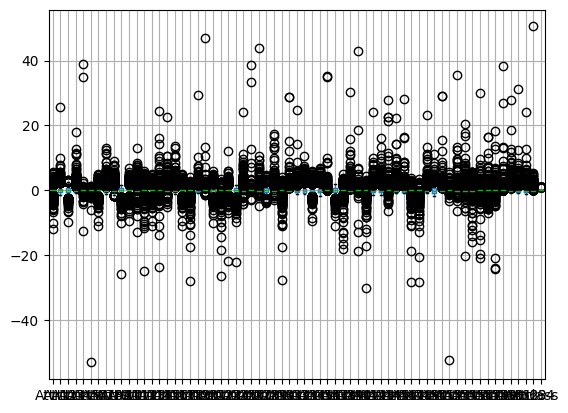

In [15]:
norm.boxplot()
plt.show()

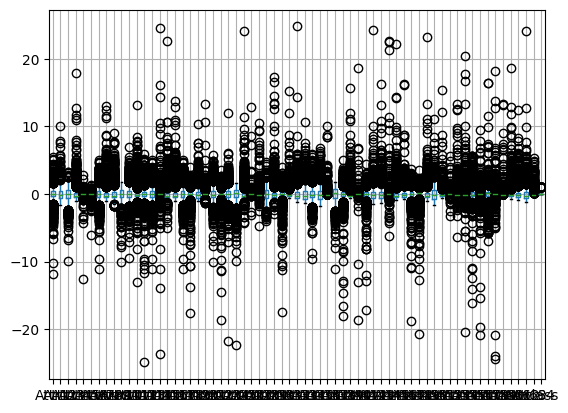

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.326817,0.056796,-0.624548,-0.505084,-0.073070,0.251360,0.389284,-0.437304,-0.376653,-0.383695,...,0.047300,0.088071,-0.095577,-0.089898,-0.088869,-0.327711,0.373189,-0.640859,-0.110085,0.0
4,-0.006870,0.042999,-0.221599,-0.388392,-0.023608,-0.012240,0.000023,-0.326910,0.213466,0.034268,...,1.038630,0.001631,-1.041020,-0.059499,-0.078429,-0.386286,0.027731,-0.452371,-0.107137,0.0
6,0.420511,0.201450,0.896500,-0.174457,0.024076,0.150248,0.501387,-0.396071,-0.364074,-0.125828,...,0.094714,0.074319,-0.144132,-0.076106,-0.095490,-0.534405,0.252046,-0.586771,0.706331,0.0
7,0.245851,-1.061197,-0.237163,0.422073,0.090782,0.269170,0.264450,1.080294,-0.177458,1.149924,...,0.715450,-0.002652,-0.779475,-0.049257,-0.073805,-0.471111,-0.474861,0.278489,-0.190295,0.0
8,0.633373,-0.584435,0.642539,0.379620,0.022834,0.223392,0.768699,0.136662,-0.171929,0.668214,...,0.732051,0.046076,-0.796466,-0.031745,-0.098027,-0.234841,-0.415279,0.124390,-0.139776,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5873,-0.266887,0.697995,-0.330698,-0.449509,-0.221305,-0.010153,-0.328039,-0.554050,-0.653396,-0.627525,...,0.803177,-0.017843,0.218913,-0.084129,-0.082670,-0.320335,1.530707,-0.895056,-0.110982,1.0
5874,0.579229,-0.056073,0.902901,-0.013117,-0.088442,-0.012240,0.459445,-0.276976,-0.252243,0.134368,...,0.333330,0.073297,-0.341595,-0.032964,-0.108336,-0.105046,0.169129,-0.543180,-0.057721,1.0
5892,0.527667,3.850595,-2.823551,-0.811479,-0.090984,-0.260403,0.411456,-0.899898,2.839073,-3.812749,...,-0.585138,-0.131421,0.169595,-0.338792,-0.067974,2.207496,-0.059988,-0.382061,-0.041514,1.0
5893,-1.155709,2.538492,-1.988575,-0.685957,-0.138938,-0.983823,-1.155270,-0.818129,1.205568,-2.486510,...,0.913660,0.086355,-0.889120,-0.185230,-0.097408,0.655753,0.518676,-0.694342,-0.019203,1.0


In [16]:
norm = norm[np.abs(norm-norm.mean()) <= (25*norm.std())]
# norm = norm.dropna()
norm.boxplot()
plt.show()
norm

In [17]:
norm = norm.dropna()
norm.groupby("class").describe()

Attr1                                                               \
        count      mean       std        min       25%       50%       75%   
class                                                                        
0.0    2886.0  0.042766  0.927428  -6.612617 -0.349311 -0.041901  0.416784   
1.0     101.0 -1.199615  1.852882 -11.846777 -1.862674 -0.813093 -0.238282   

                  Attr2            ...    Attr63             Attr64            \
            max   count      mean  ...       75%        max   count      mean   
class                              ...                                          
0.0    5.485441  2886.0 -0.037979  ...  0.275660  24.144499  2886.0 -0.023189   
1.0    1.680854   101.0  0.774252  ... -0.263948   4.927850   101.0  0.155026   

                                                                   
            std       min       25%       50%       75%       max  
class                                                              
0.0    0.364432 -0.202469 -0.149761 -0.110761 -0.038937  5.294000  
1.0    0.791976 -0.202563 -0.158474 -0.111937 -0.005328  3.973541  

[2 rows x 512 columns]

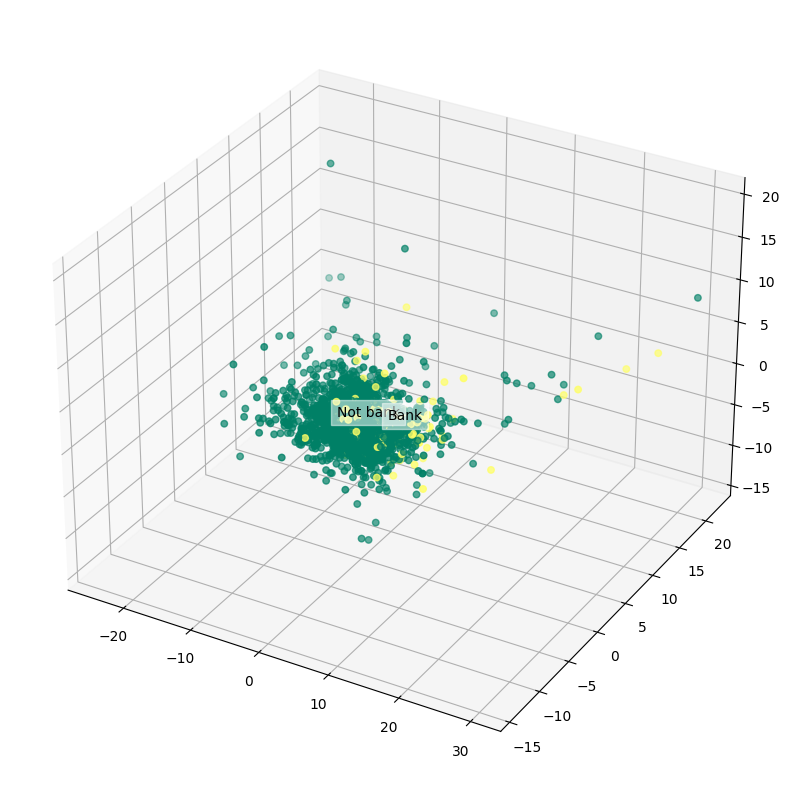

In [18]:
pca = decomposition.PCA(n_components=3)
X = norm.drop(columns='class')
Y = norm["class"]
pca.fit(X)
X_tran = pca.transform(X)
plt.figure(figsize =(10, 10))
plot_axes = plt.axes(projection = '3d')
for name, label in [("Not bank", 0), ("Bank", 1)]:
    plot_axes.text3D(
        X_tran[Y == label, 0].mean(),
        X_tran[Y == label, 1].mean() + 1.5,
        X_tran[Y == label, 1].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
plot_axes.scatter3D(X_tran[:, 0], X_tran[:, 1], X_tran[:, 2], s=22, c=Y, cmap=plt.cm.summer)
plt.show()

/home/krystian/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/krystian/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2987 samples in 0.001s...
[t-SNE] Computed neighbors for 2987 samples in 0.066s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2987
[t-SNE] Computed conditional probabilities for sample 2000 / 2987
[t-SNE] Computed conditional probabilities for sample 2987 / 2987
[t-SNE] Mean sigma: 1.169834
[t-SNE] Computed conditional probabilities in 0.051s
[t-SNE] Iteration 50: error = 81.4852142, gradient norm = 0.0022449 (50 iterations in 0.715s)
[t-SNE] Iteration 100: error = 78.9396973, gradient norm = 0.0000922 (50 iterations in 0.523s)
[t-SNE] Iteration 150: error = 78.9373093, gradient norm = 0.0000161 (50 iterations in 0.398s)
[t-SNE] Iteration 200: error = 78.9374542, gradient norm = 0.0000254 (50 iterations in 0.406s)
[t-SNE] Iteration 250: error = 78.9376602, gradient norm = 0.0000120 (50 iterations in 0.397s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.937660
[t-SNE] Iteration 300: erro

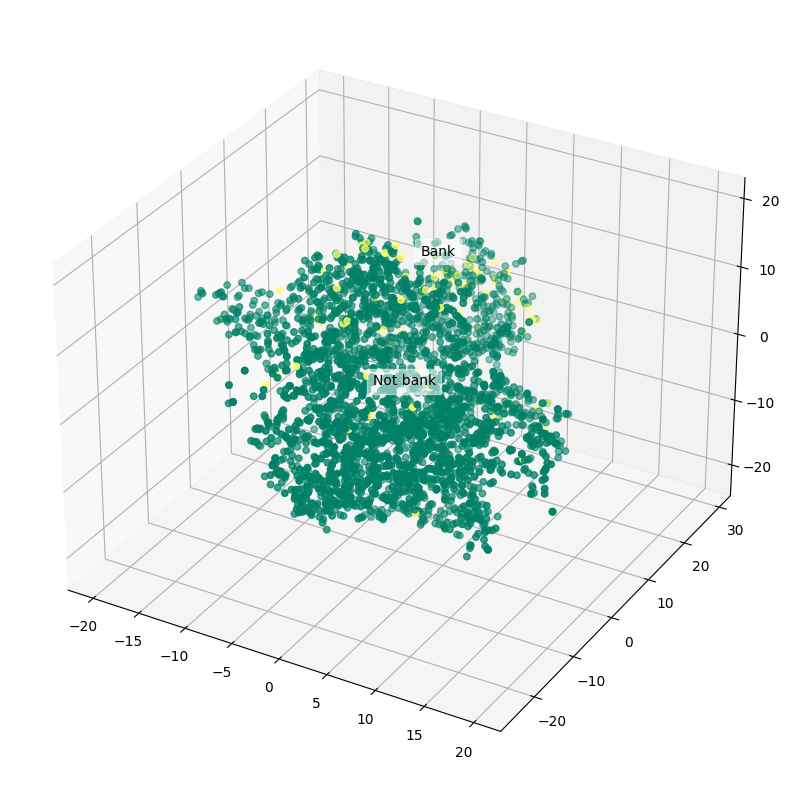

In [19]:
from sklearn import manifold

tsne = manifold.TSNE(n_components=3, random_state=0, perplexity= 30, n_iter=800, verbose=2)
X2 = tsne.fit_transform(X)
plt.figure(figsize =(10, 10))
plot_axes = plt.axes(projection = '3d')
for name, label in [("Not bank", 0), ("Bank", 1)]:
    plot_axes.text3D(
        X2[Y == label, 0].mean(),
        X2[Y == label, 1].mean() + 1.5,
        X2[Y == label, 1].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
plot_axes.scatter3D(X2[:, 0], X2[:, 1], X2[:, 2], s=22, c=Y, cmap=plt.cm.summer)
plt.show()

## SKLearn preprocessing

Here I will try to apply build-in preprocessing methods.

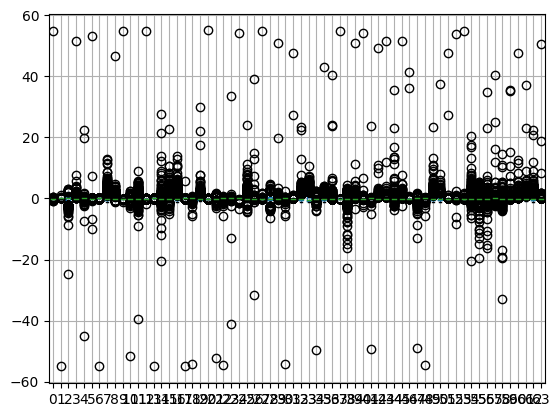

In [44]:
from sklearn import preprocessing
from scipy import stats

classes = all_df["class"]
noclass = all_df.drop(["class"],axis=1)

x = noclass
# min_max_scaler = preprocessing.QuantileTransformer(n_quantiles=5000)
# min_max_scaler = preprocessing.MaxAbsScaler()
min_max_scaler = preprocessing.StandardScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
 
df.boxplot()
plt.show()

In [45]:
# q_low = df.quantile(0.01)
# q_hi  = df.quantile(0.99)
# df = df[(df < q_hi) & (df > q_low)]

# df.boxplot()
# plt.show()
# df

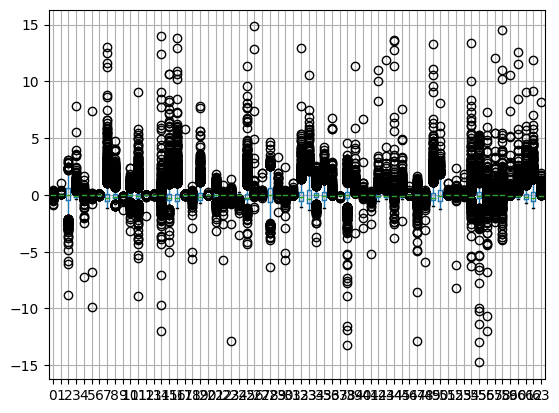

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.006675,0.020298,-0.549991,-0.177912,-0.026821,0.015309,0.023533,-0.436021,-0.212378,-0.037228,...,0.081507,0.047814,0.056445,-0.063337,-0.061398,-0.060586,-0.168680,0.260014,-0.600041,-0.060357
1,-0.018488,0.019749,-0.191139,-0.141493,0.001511,-0.018198,0.018192,-0.325335,0.098282,-0.016289,...,-0.191666,0.956961,-0.010545,-0.379795,-0.037031,-0.056483,-0.195352,0.006140,-0.425176,-0.059265
2,0.013740,0.026062,0.804600,-0.074725,0.028825,0.002457,0.025071,-0.394679,-0.205756,-0.024309,...,-0.081363,0.091297,0.045787,-0.079589,-0.050342,-0.063188,-0.262796,0.170987,-0.549862,0.242290
3,0.000569,-0.024245,-0.205000,0.111450,0.067035,0.017573,0.021820,1.085581,-0.107515,0.039603,...,0.040173,0.660574,-0.013864,-0.292251,-0.028822,-0.054666,-0.233976,-0.363210,0.252860,-0.090091
4,0.029792,-0.005250,0.578431,0.098201,0.028113,0.011754,0.028740,0.139460,-0.104604,0.015470,...,0.364348,0.675798,0.023900,-0.297938,-0.014784,-0.064185,-0.126393,-0.319424,0.109898,-0.071364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3026,-0.038095,0.045845,-0.288298,-0.160567,-0.111731,-0.017933,0.013690,-0.553075,-0.358066,-0.049443,...,0.193866,0.741028,-0.025637,0.041929,-0.056773,-0.058150,-0.165322,1.110662,-0.835865,-0.060690
3027,0.025709,0.015801,0.810300,-0.024371,-0.035626,-0.018198,0.024496,-0.275270,-0.146884,-0.011274,...,-0.155321,0.310132,0.044995,-0.145683,-0.015762,-0.068236,-0.067293,0.110051,-0.509422,-0.040946
3028,0.021821,0.171451,-2.508343,-0.273537,-0.037083,-0.049744,0.023837,-0.899835,1.480498,-0.209015,...,-0.211789,-0.532193,-0.113658,0.025422,-0.260901,-0.052375,0.985693,-0.058324,-0.359948,-0.034938
3029,-0.105120,0.119174,-1.764744,-0.234362,-0.064551,-0.141702,0.002338,-0.817851,0.620561,-0.142574,...,-0.231349,0.842352,0.055115,-0.328951,-0.137811,-0.063941,0.279127,0.366930,-0.649658,-0.026667


In [46]:
df = df[np.abs(df-df.mean()) < (15*df.std())]
df.boxplot()
plt.show()
df

In [47]:
df['class'] = classes.tolist()
df = df.dropna()
df.groupby("class").describe()
# df

0                                                               \
        count      mean       std       min       25%       50%       75%   
class                                                                       
0.0    2885.0 -0.014425  0.069713 -0.516618 -0.044276 -0.020927  0.013494   
1.0     101.0 -0.108431  0.139723 -0.911318 -0.158431 -0.079284 -0.035938   

                     1             ...        62                 63           \
            max   count      mean  ...       75%        max   count     mean   
class                              ...                                         
0.0    0.395679  2885.0  0.016903  ...  0.250936  11.849122  2885.0 -0.02819   
1.0    0.108781   101.0  0.048883  ... -0.250372   4.566176   101.0  0.03792   

                                                                   
            std       min       25%       50%       75%       max  
class                                                              
0.0    0.133458 -0.094404 -0.075066 -0.060593 -0.033718  1.942949  
1.0    0.293587 -0.094639 -0.078295 -0.061044 -0.021524  1.453452  

[2 rows x 512 columns]

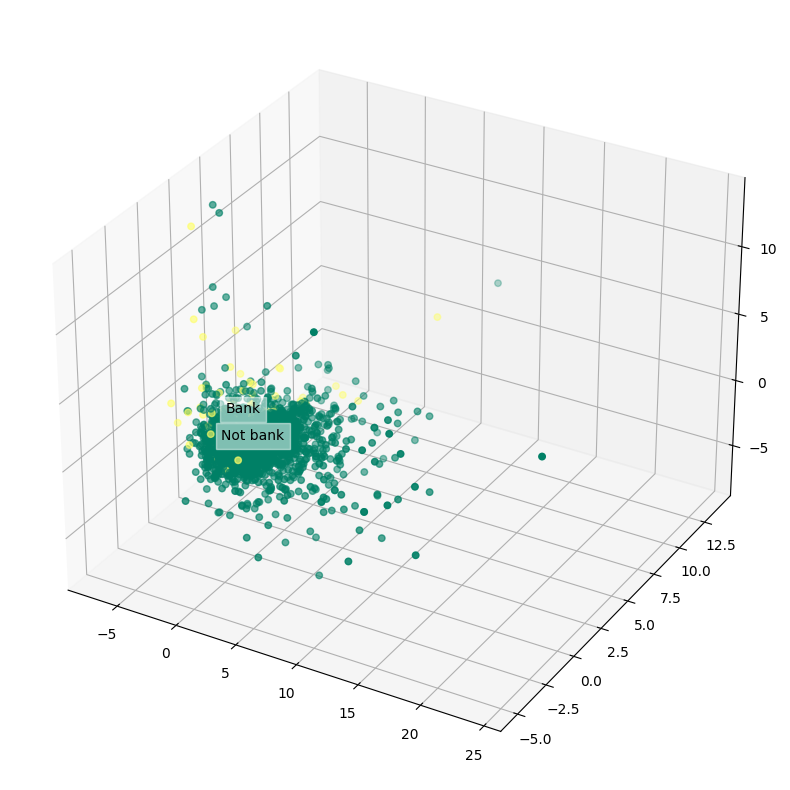

In [48]:
pca = decomposition.PCA(n_components=3)
X = df.drop(columns='class')
Y = df["class"]
pca.fit(X)
X_tran = pca.transform(X)
plt.figure(figsize =(10, 10))
plot_axes = plt.axes(projection = '3d')
for name, label in [("Not bank", 0), ("Bank", 1)]:
    plot_axes.text3D(
        X_tran[Y == label, 0].mean(),
        X_tran[Y == label, 1].mean(),
        X_tran[Y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
plot_axes.scatter3D(X_tran[:, 0], X_tran[:, 1], X_tran[:, 2], s=22, c=Y, cmap=plt.cm.summer)
plt.show()

/home/krystian/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2986 samples in 0.001s...
[t-SNE] Computed neighbors for 2986 samples in 0.056s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2986
[t-SNE] Computed conditional probabilities for sample 2000 / 2986
[t-SNE] Computed conditional probabilities for sample 2986 / 2986
[t-SNE] Mean sigma: 0.275432
[t-SNE] Computed conditional probabilities in 0.055s
[t-SNE] Iteration 50: error = 83.5465393, gradient norm = 0.0123761 (50 iterations in 0.608s)
[t-SNE] Iteration 100: error = 72.4953918, gradient norm = 0.0003917 (50 iterations in 0.568s)
[t-SNE] Iteration 150: error = 72.4341202, gradient norm = 0.0000699 (50 iterations in 0.587s)
[t-SNE] Iteration 200: error = 72.4330292, gradient norm = 0.0000500 (50 iterations in 0.668s)
[t-SNE] Iteration 250: error = 72.4323502, gradient norm = 0.0000491 (50 iterations in 0.608s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.432350
[t-SNE] Iteration 300: erro

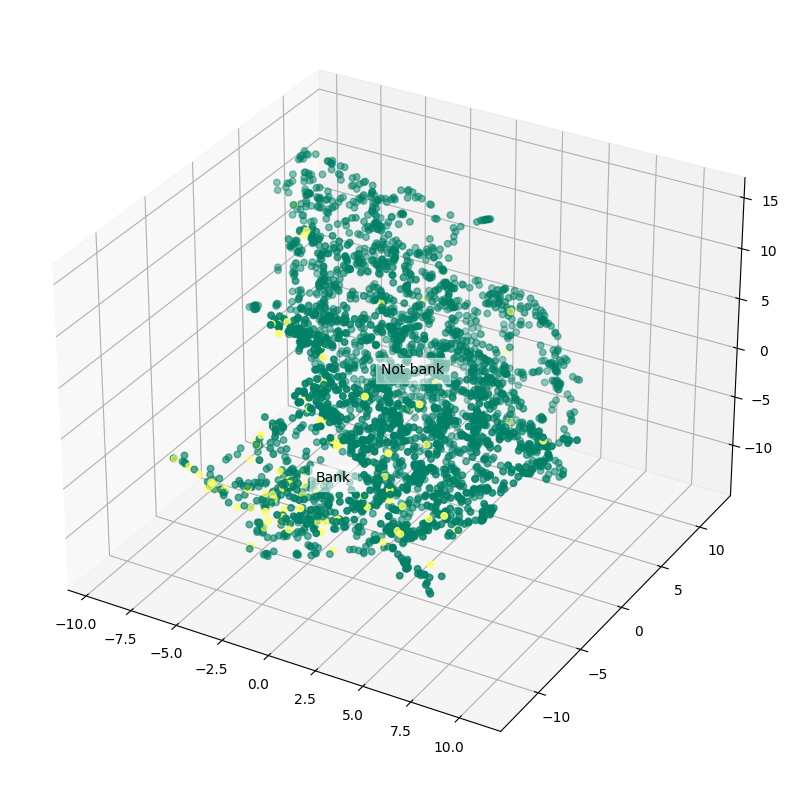

In [49]:
from sklearn import manifold

tsne = manifold.TSNE(n_components=3, random_state=0, perplexity= 30,learning_rate=90, n_iter=600, verbose=2)
X2 = tsne.fit_transform(X_tran)
plt.figure(figsize =(10, 10))
plot_axes = plt.axes(projection = '3d')
for name, label in [("Not bank", 0), ("Bank", 1)]:
    plot_axes.text3D(
        X2[Y == label, 0].mean(),
        X2[Y == label, 1].mean() + 1.5,
        X2[Y == label, 1].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
plot_axes.scatter3D(X2[:, 0], X2[:, 1], X2[:, 2], s=22, c=Y, cmap=plt.cm.summer)
plt.show()

# Classification

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X2, Y, test_size=0.5, random_state=0)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

fs = f1_score(y_test,y_pred, average=None)
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred, average=None)
rec = recall_score(y_test,y_pred, average=None)

fs, acc, prec, rec

(array([0.9797876 , 0.11940299]),
 0.9604822505023443,
 array([0.96817874, 0.25      ]),
 array([0.99167822, 0.07843137]))

      Exact_values  Predictions
2735           0.0          0.0
1977           0.0          0.0
321            0.0          0.0
1729           0.0          0.0
709            0.0          0.0
...            ...          ...
1391           0.0          1.0
1730           0.0          0.0
697            0.0          0.0
1160           0.0          0.0
1083           0.0          0.0

[1493 rows x 2 columns]
Predictions    0.0  1.0
Exact_values           
0.0           1430   12
1.0             47    4


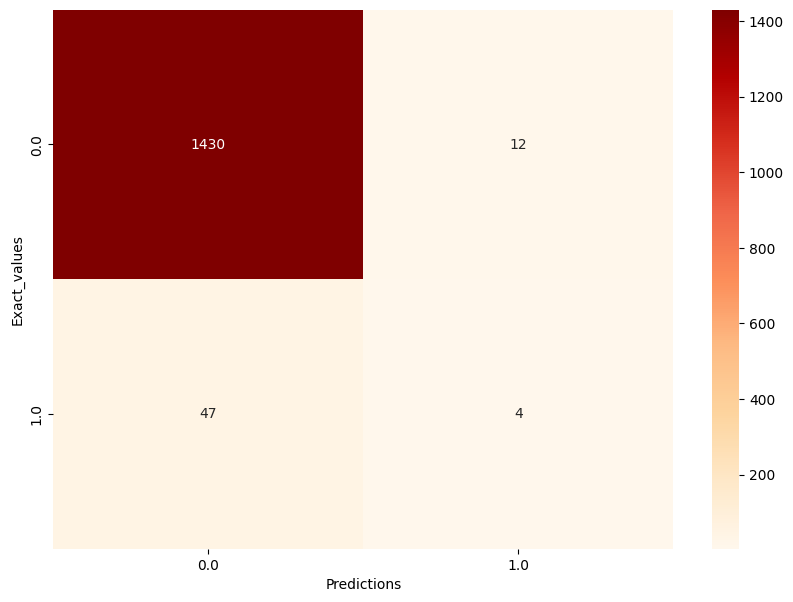

In [86]:
data = {'Exact_values': y_test, "Predictions": y_pred}
df = pd.DataFrame(data=data)
print(df)

results = pd.crosstab(df['Exact_values'],df['Predictions'])
print(results)
plt.figure(figsize=(10,7))
sns.heatmap(results, annot=True, cmap="OrRd", fmt=".0f")
plt.show()